## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [14]:
df = pd.read_csv('/drive/MyDrive/Copy of Hotel Bookings.csv')

In [15]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [18]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [19]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [20]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [23]:
#there are some missing in company and agent, lets explore them

In [24]:
# this agent may have 2 meanings , 1. they are the dealers who bring the customers to property, but as we look into in, we can see many different numeric
# numbers, so they may be the agents who were there at the counter when customer visited. so we can check who was the most frequent agent and will replace 
# with them

In [25]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [26]:
df['agent'].mode()

0    9.0
dtype: float64

In [27]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [28]:
# so number 9 has taken the maximum customer/queries(may be)

In [29]:
df['agent'].fillna(value = 9.0, inplace = True)

 check company column


In [30]:
df['company'].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18    110.0
19      NaN
Name: company, dtype: float64

In [31]:
# most of the things are NAN, so we can remove this column, because there is no further info regarding this company

In [32]:
df.drop('company', axis = 1, inplace  = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
# null values cleared

In [10]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [9]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

## BOOKING INCREAMENTS

In [35]:
import seaborn as sns

In [36]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


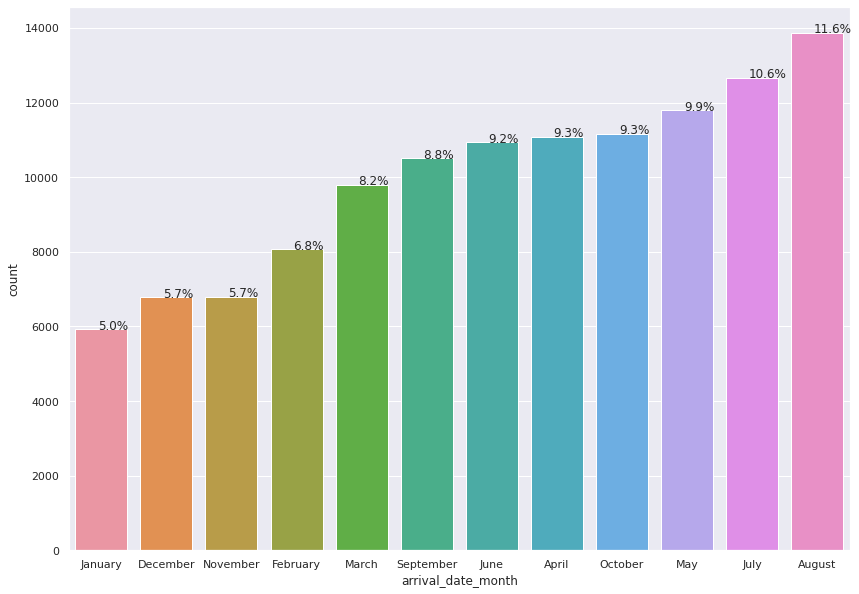

In [37]:
plt.figure(figsize= (14,10))

ax = sns.countplot(df['arrival_date_month'], order = df['arrival_date_month'].value_counts().sort_values(ascending=True).index)
without_hue(ax, df['arrival_date_month'])

In [38]:
# so in january least no. of guest arrived and in august maximum

In [39]:
df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'].value_counts()

14    632
8     555
17    531
15    527
18    507
3     503
1     502
10    493
12    491
25    486
7     472
20    467
13    465
28    462
5     460
24    459
26    458
16    448
11    437
22    424
19    419
27    415
29    398
4     389
21    388
6     381
31    377
9     351
2     337
30    322
23    321
Name: arrival_date_day_of_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


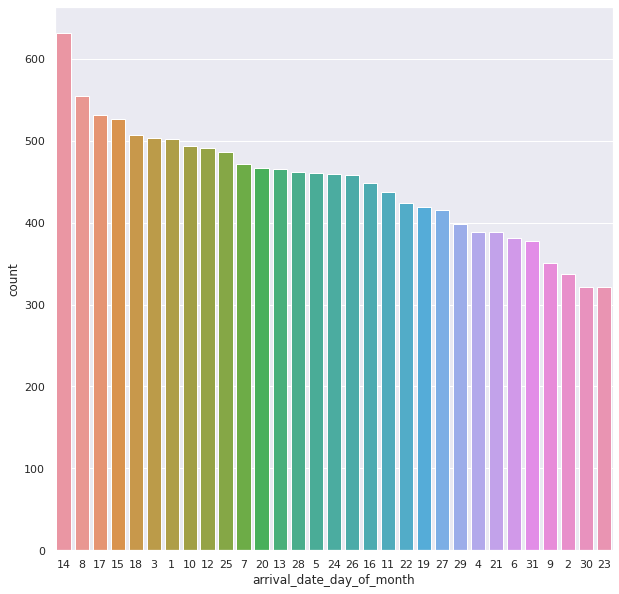

In [40]:
plt.figure(figsize= (10,10))

dx = sns.countplot(df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'], order = df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'].value_counts().index)
without_hue(dx, df[df['arrival_date_month'] == 'August']['arrival_date_day_of_month'])

In [41]:
# around 14- 20 august , the highest no. of guest arrived, so hotel can manage their inventory/ or hotel staff according to that

## Hotel Prefernce by Customer Type

Text(0.5, 1.0, 'Hotel preference by customer type')

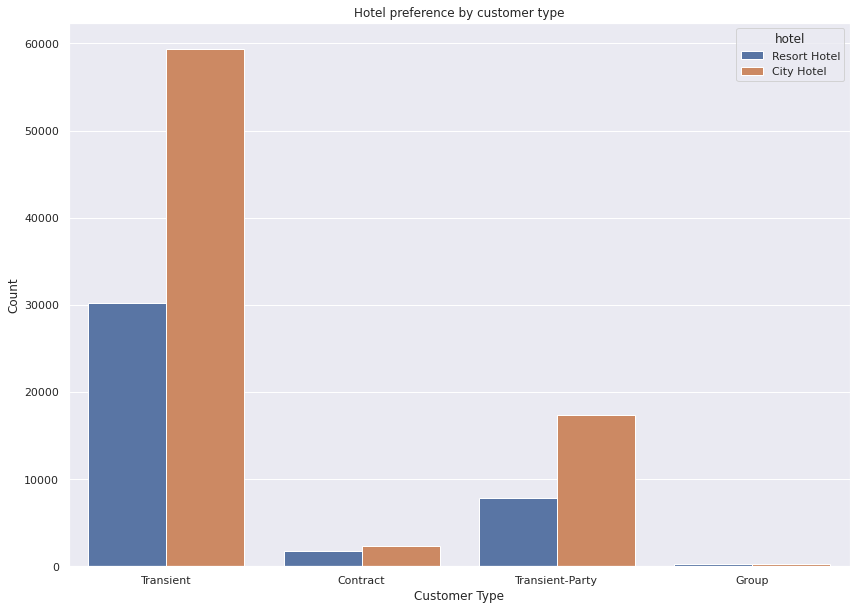

In [42]:
plt.figure(figsize= (14,10))
sns.countplot(x = 'customer_type', hue ='hotel', data = df)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Hotel preference by customer type')

## Total Stay Duration

In [43]:
# total stay is weekend + weekdays stays

In [44]:
df['stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [45]:
df.stays.max()

69

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


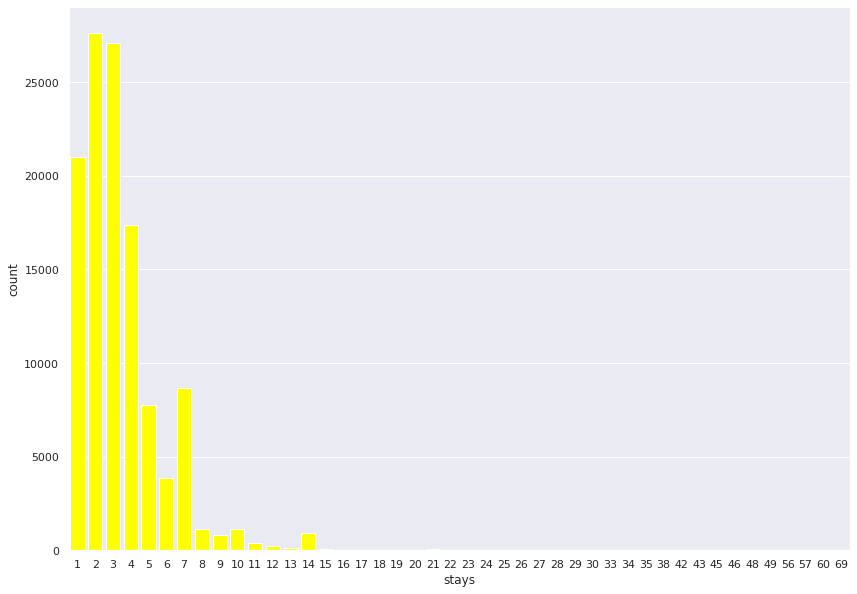

In [46]:
plt.figure(figsize= (14,10))
sns.countplot(df[df['stays'] != 0]['stays'], facecolor='yellow')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1263676f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1263693890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f126368e850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f126369a390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f126369a8d0>],
 'means': []}

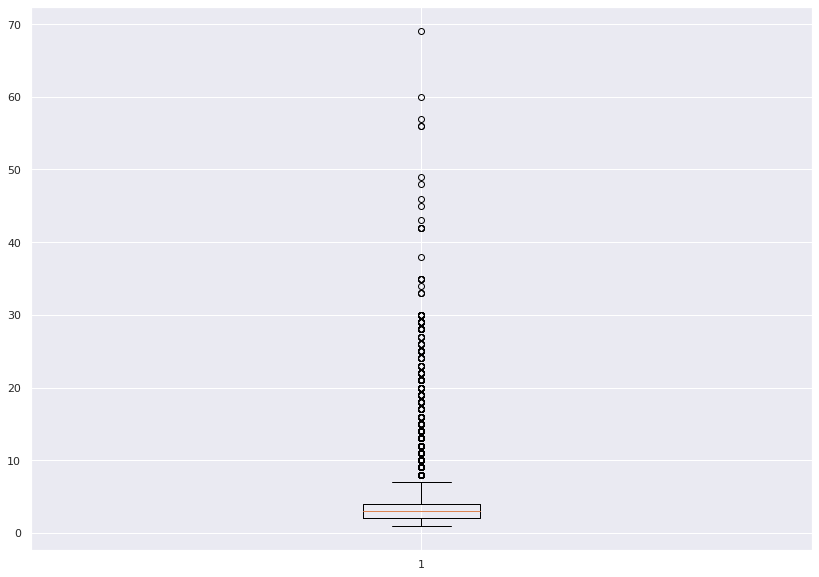

In [47]:
plt.figure(figsize= (14,10))

plt.boxplot(df[df['stays'] != 0]['stays'] )

In [48]:
df[df['stays'] > 14]['stays'].value_counts()

15    75
21    71
16    40
25    37
18    35
28    35
19    22
17    20
20    14
22    14
29    14
30    13
23     8
24     6
26     6
35     5
27     5
42     4
33     3
56     2
46     1
60     1
69     1
45     1
38     1
48     1
49     1
57     1
34     1
43     1
Name: stays, dtype: int64

In [49]:
# so we can see there are a lot of outliers after 30 days of stay(lets say), so a few people stayed approximately for a month and most guest stays for 5 days on an average

# Average Daily Rate, and cleaning data

In [50]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [51]:
df[df['adr'] < 0].index

Int64Index([14969], dtype='int64')

In [52]:
# we can remove this permanently from our database

In [53]:
df.drop(df[df['adr'] < 0].index, axis = 0, inplace= True)

In [54]:
# cancellation

In [55]:
df[df['is_canceled'] == 0]['adr'].describe()

count    75165.000000
mean        99.989108
std         49.205061
min          0.000000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [56]:
df[df['is_canceled'] == 0][df['adr'] == 0][df['stays'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [57]:
# we can see 680 booking was there with no average rate, and also the stays of these guests were ZERO, that means, they have booked it but never showed up
# so it should not be mention "check-out" in the "reservation_status", we should replace it with something else -- NSU (never showed up(lets say))

In [58]:
df_with_wrong_res_type = df[df['is_canceled'] == 0][df['adr'] == 0][df['stays'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [59]:
df_with_wrong_res_type['reservation_status'] = df_with_wrong_res_type['reservation_status'].replace(['Check-Out','never showed up'])

In [60]:
df_with_right_res_type = df_with_wrong_res_type

In [61]:
# now we will remove the rows having the wrong reservation type, and then we will add/concat these new rows with them

In [62]:
df4 = df.copy()

In [63]:
df_without_wrong_res_type = df4.drop([0, 1, 167, 168, 196, 197, 459, 568, 569, 618, 619, 665, 722, 774, 814, 815, 882, 893, 894, 907, 908, 934, 1007, 1029, 1030, 1093, 1215, 1230, 1232, 1354, 1609, 1835, 2218, 2408, 2409, 2439, 2443, 2444, 2445, 2530, 2531, 2691, 2753, 2766, 2859, 2919, 2973, 3069, 3070, 3089, 3090, 3091, 3100, 3233, 3234, 3259, 3271, 3275, 3303, 3447, 3463, 3471, 3555, 3556, 3821, 4529, 4736, 4823, 4910, 5616, 5764, 5834, 6234, 6235, 6236, 6488, 8064, 13973, 14069, 14241, 14318, 14434, 14610, 15060, 15086, 15370, 15797, 15952, 16375, 17158, 17296, 17484, 17543, 17544, 17545, 17585, 17586, 17747, 17751, 17932, 18005, 18435, 18557, 18621, 18642, 18688, 18715, 18836, 19044, 19045, 19049, 19239, 19241, 19243, 19324, 19350, 19357, 19363, 19474, 19504, 19579, 19593, 19604, 19605, 19606, 19649, 19803, 19811, 19825, 19827, 19947, 19950, 19991, 20159, 20173, 20192, 20196, 20337, 20361, 20362, 20456, 20457, 20814, 20874, 21222, 21245, 21304, 21305, 21359, 21489, 21576, 21577, 21578, 21671, 21799, 21807, 21897, 21968, 21971, 21999, 22030, 22062, 22104, 22238, 22239, 22272, 22343, 22367, 22369, 22523, 22568, 22680, 22751, 22767, 22768, 22943, 22962, 22969, 23027, 23043, 23455, 23491, 23507, 23508, 23511, 23606, 23736, 23737, 23768, 23769, 23775, 23842, 23864, 23962, 23980, 24034, 24049, 24137, 24324, 24340, 24348, 24389, 24424, 24495, 24604, 24767, 24870, 24871, 24887, 25072, 25083, 25084, 25113, 25137, 25168, 25180, 25211, 25212, 25213, 25250, 25252, 25334, 25366, 25424, 25482, 25507, 25508, 25563, 25698, 25784, 25840, 25882, 25974, 26045, 26066, 26068, 26069, 26095, 26399, 26400, 26449, 26489, 26490, 26541, 26648, 26765, 26960, 27212, 27217, 27261, 27438, 27441, 27493, 27673, 27711, 27838, 28076, 28447, 28507, 28591, 28672, 28733, 28843, 28924, 28941, 28963, 29040, 29219, 29220, 29221, 29380, 29387, 29388, 29486, 29487, 29488, 29578, 29579, 29728, 29915, 29917, 29918, 29927, 29954, 29983, 30006, 30272, 30462, 30500, 30502, 30519, 30756, 30764, 30842, 30904, 30905, 30935, 30936, 30947, 31040, 31065, 31066, 31072, 31085, 31086, 31099, 31100, 31230, 31232, 31307, 31311, 31375, 31403, 31455, 31514, 31548, 31680, 32003, 32103, 32114, 32117, 32118, 32119, 32120, 32121, 32122, 32324, 32479, 32675, 32850, 32851, 32884, 32964, 33039, 33059, 33074, 33075, 33791, 33933, 33943, 33958, 34332, 34706, 34723, 35354, 35355, 35635, 35636, 35637, 35787, 36024, 36050, 36051, 36063, 36490, 36523, 37413, 37730, 37865, 37866, 38233, 38234, 38235, 38396, 38448, 38450, 38452, 38776, 38967, 39377, 39527, 39852, 40533, 40534, 41021, 41139, 42024, 43753, 43796, 43797, 44503, 44567, 44887, 45124, 45619, 46203, 46578, 46596, 46722, 46857, 53481, 76324, 77147, 77170, 77205, 77447, 77612, 77759, 77999, 78049, 78078, 78079, 78359, 78380, 78495, 79023, 79159, 79261, 79615, 79897, 79931, 79940, 80069, 80072, 80782, 80907, 80984, 81369, 81370, 81407, 81642, 81650, 81651, 81652, 82073, 82208, 82258, 82264, 82265, 82266, 82267, 82277, 82982, 82984, 83164, 83579, 83609, 83610, 83718, 83900, 83911, 83945, 84252, 84319, 84481, 84490, 84496, 84497, 84500, 84949, 85055, 85401, 85431, 85432, 85433, 85490, 85491, 85593, 85723, 85724, 85780, 85888, 86047, 86317, 87113, 87114, 87523, 87699, 87938, 87957, 88065, 88096, 88225, 89096, 89097, 89098, 89099, 89100, 89101, 89102, 89103, 89104, 89105, 89106, 89107, 89108, 89109, 89110, 89111, 89112, 89113, 89114, 89115, 89116, 89117, 89118, 89119, 89120, 89121, 89263, 89269, 89352, 89354, 89359, 89360, 89374, 89439, 89919, 90258, 90443, 90486, 90735, 91428, 91580, 92224, 92278, 92346, 92347, 92413, 92562, 92589, 92629, 93139, 93257, 93266, 93753, 93754, 93828, 94877, 94878, 95164, 95212, 95547, 95733, 95963, 96297, 96695, 96811, 97209, 97762, 98490, 98506, 98554, 98772, 98773, 99005, 99111, 99220, 99265, 99286, 99339, 99353, 99490, 99496, 99565, 99604, 99608, 99810, 100002, 100284, 100286, 100384, 100487, 100491, 100494, 100670, 100780, 100785, 100843, 100957, 100965, 100966, 100975, 100978, 101133, 101184, 101186, 101197, 101211, 101242, 101329, 101624, 101658, 101804, 101805, 102005, 102054, 102055, 102155, 102157, 102255, 102258, 102296, 102320, 102402, 102568, 102611, 102710, 102805, 102808, 102812, 102853, 102898, 103264, 103317, 103441, 103926, 103927, 103936, 103961, 104231, 104317, 104656, 104784, 104876, 104958, 105007, 105106, 105185, 105211, 105217, 105218, 105298, 105412, 105454, 105455, 105577, 105623, 105630, 105726, 105728, 105878, 106406, 106556, 106570, 106628, 106638, 106647, 106706, 106825, 106826, 106955, 107027, 107033, 107074, 107154, 107157, 107543, 107676, 107977, 107979, 108018, 108100, 108233, 108234, 108235, 108577, 108578, 108627, 108628, 109493, 110870, 111027, 111028, 111402, 111709, 111710, 112973, 113188, 113437, 113930, 114678, 114908, 114911, 115482, 115483, 117701, 118029, 118631, 118963])

In [64]:
df6 = pd.concat([df_without_wrong_res_type, df_with_right_res_type])

In [65]:
df6.reset_index(inplace=True)

In [66]:
df6.drop('index', axis = 1, inplace = True)

In [67]:
df6.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [68]:
df6['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [69]:
df6[df6['reservation_status'] == 'No-Show']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
120,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,No Deposit,250.0,0,Transient,123.00,0,0,No-Show,2015-07-04,1
322,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12,14
337,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,No Deposit,241.0,0,Transient,103.80,0,0,No-Show,2015-07-12,5
460,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,No Deposit,241.0,0,Transient,110.50,0,1,No-Show,2015-07-17,2
465,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,No Deposit,5.0,0,Transient,107.60,0,0,No-Show,2015-07-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104037,City Hotel,1,1,2017,February,5,1,0,0,1,...,No Deposit,9.0,0,Transient,0.00,0,1,No-Show,2017-02-01,0
107802,City Hotel,1,31,2017,July,29,16,2,0,1,...,No Deposit,9.0,0,Transient,135.00,0,2,No-Show,2017-07-16,2
108168,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,9.0,0,Transient,125.00,0,0,No-Show,2017-05-06,3
111257,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,9.0,0,Transient,65.00,0,0,No-Show,2017-07-17,1


In [70]:
# here we have 1206 guest with reservation status = "NO show", i.e they have not showed up, but we can see, few of them have stayed in the hotel, 
# so its a mistake
# it should be "check-out" where stays not equal to zero

In [71]:
df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
120,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,No Deposit,250.0,0,Transient,123.00,0,0,No-Show,2015-07-04,1
322,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12,14
337,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,No Deposit,241.0,0,Transient,103.80,0,0,No-Show,2015-07-12,5
460,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,No Deposit,241.0,0,Transient,110.50,0,1,No-Show,2015-07-17,2
465,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,No Deposit,5.0,0,Transient,107.60,0,0,No-Show,2015-07-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97427,City Hotel,1,0,2016,October,42,10,1,2,1,...,No Deposit,9.0,0,Transient,153.00,0,0,No-Show,2016-10-10,3
107802,City Hotel,1,31,2017,July,29,16,2,0,1,...,No Deposit,9.0,0,Transient,135.00,0,2,No-Show,2017-07-16,2
108168,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,9.0,0,Transient,125.00,0,0,No-Show,2017-05-06,3
111257,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,9.0,0,Transient,65.00,0,0,No-Show,2017-07-17,1


In [72]:
# we need to replace this "No-Show" with "check-out"

In [74]:
right_res_type = df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0]['reservation_status'].replace(['No-Show'],'Check-Out')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [75]:
right_res_type.reset_index()

,index,reservation_status
0,120,Check-Out
1,322,Check-Out
2,337,Check-Out
3,460,Check-Out
4,465,Check-Out
...,...,...
1189,97427,Check-Out
1190,107802,Check-Out
1191,108168,Check-Out
1192,111257,Check-Out


In [76]:
df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0]['reservation_status'] = right_res_type.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [77]:
df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0]['reservation_status']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


120       No-Show
322       No-Show
337       No-Show
460       No-Show
465       No-Show
           ...   
97427     No-Show
107802    No-Show
108168    No-Show
111257    No-Show
116618    No-Show
Name: reservation_status, Length: 1194, dtype: object

In [78]:
# these are not working, so we need to something as in the previous case, first frop these values and then append the variable "right_res_type"

In [79]:
df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Int64Index([   120,    322,    337,    460,    465,    948,   1034,   1038,
              1442,   1523,
            ...
             88853,  88854,  89531,  93779,  95356,  97427, 107802, 108168,
            111257, 116618],
           dtype='int64', length=1194)

In [80]:
df_with_no_res_status = df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0].drop('reservation_status', axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [81]:
df_with_no_res_status

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,stays
120,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,1,No Deposit,250.0,0,Transient,123.00,0,0,2015-07-04,1
322,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,2,No Deposit,8.0,0,Contract,133.16,0,1,2015-07-12,14
337,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,0,No Deposit,241.0,0,Transient,103.80,0,0,2015-07-12,5
460,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,0,No Deposit,241.0,0,Transient,110.50,0,1,2015-07-17,2
465,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,0,No Deposit,5.0,0,Transient,107.60,0,0,2015-07-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97427,City Hotel,1,0,2016,October,42,10,1,2,1,...,0,No Deposit,9.0,0,Transient,153.00,0,0,2016-10-10,3
107802,City Hotel,1,31,2017,July,29,16,2,0,1,...,1,No Deposit,9.0,0,Transient,135.00,0,2,2017-07-16,2
108168,City Hotel,1,25,2017,May,18,6,2,1,1,...,0,No Deposit,9.0,0,Transient,125.00,0,0,2017-05-06,3
111257,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,9.0,0,Transient,65.00,0,0,2017-07-17,1


In [82]:
df_with_no_res_status['reservation_status'] = 'Check-Out'

In [83]:
df_with_no_res_status

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,stays,reservation_status
120,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,No Deposit,250.0,0,Transient,123.00,0,0,2015-07-04,1,Check-Out
322,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,0,Contract,133.16,0,1,2015-07-12,14,Check-Out
337,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,No Deposit,241.0,0,Transient,103.80,0,0,2015-07-12,5,Check-Out
460,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,No Deposit,241.0,0,Transient,110.50,0,1,2015-07-17,2,Check-Out
465,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,No Deposit,5.0,0,Transient,107.60,0,0,2015-07-17,2,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97427,City Hotel,1,0,2016,October,42,10,1,2,1,...,No Deposit,9.0,0,Transient,153.00,0,0,2016-10-10,3,Check-Out
107802,City Hotel,1,31,2017,July,29,16,2,0,1,...,No Deposit,9.0,0,Transient,135.00,0,2,2017-07-16,2,Check-Out
108168,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,9.0,0,Transient,125.00,0,0,2017-05-06,3,Check-Out
111257,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,9.0,0,Transient,65.00,0,0,2017-07-17,1,Check-Out


In [84]:
df6.drop(df6[df6['reservation_status'] == 'No-Show'][df6['stays'] != 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [85]:
df7 = pd.concat([df6,df_with_no_res_status])

In [86]:
df7[df7['reservation_status'] == 'Check-Out'][df7['stays'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
118709,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
118710,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
118711,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
118712,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
118713,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,15,2017,July,27,6,0,0,1,...,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
119385,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
119386,City Hotel,0,0,2017,August,33,14,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
119387,City Hotel,0,78,2017,August,34,23,0,0,1,...,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [87]:
# now we need to change this check out to never showed up, because stays = 0 here and is_canceled = false

In [88]:
df8 = df7.copy()

In [89]:
df8_with_no_res_status = df8[df8['reservation_status'] == 'Check-Out'][df8['stays'] == 0].drop('reservation_status', axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [90]:
df8_with_no_res_status['reservation_status'] = "never showed up"

In [91]:
df8.drop(df8[df8['reservation_status'] == 'Check-Out'][df8['stays'] == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [92]:
df9 = pd.concat([df8, df8_with_no_res_status])

In [93]:
# now we can proceed with the average daily rate of the rooms

## Average Daily rate

In [94]:
df9[df9['adr'] == 0][df9['reservation_status'] == 'Check-Out']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
123,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-05,1
422,Resort Hotel,0,57,2015,July,29,15,0,2,1,...,No Deposit,305.0,0,Transient-Party,0.0,0,0,Check-Out,2015-07-17,2
1624,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,2015-10-23,46
1674,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-09-11,1
2082,Resort Hotel,0,0,2015,October,40,2,0,2,2,...,No Deposit,9.0,0,Transient,0.0,0,2,Check-Out,2015-10-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63319,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-02-18,1
69163,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-06-02,1
77806,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-10-06,1
80556,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,0.0,0,0,Check-Out,2015-11-30,1


In [95]:
# we can see some of the average daily rates values are zero, we need to replace it with something

{'whiskers': [<matplotlib.lines.Line2D at 0x7f126350f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f126350fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f126351cd10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1263502890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1263502dd0>],
 'means': []}

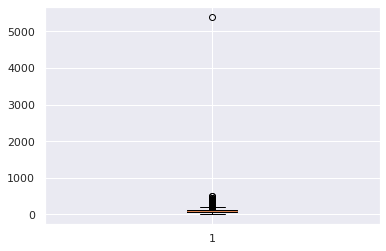

In [96]:
plt.boxplot(df9['adr'])

In [97]:
# we can see an outlier, we should use median

In [98]:
df9['adr'].median()

94.59

In [99]:
df9_wrong_adr = df9[df9['adr'] == 0][df9['reservation_status'] == 'Check-Out']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [100]:
df9_wrong_adr['adr'] = 94.59

In [101]:
df9_wrong_adr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
123,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,9.0,0,Transient,94.59,0,1,Check-Out,2015-07-05,1
422,Resort Hotel,0,57,2015,July,29,15,0,2,1,...,No Deposit,305.0,0,Transient-Party,94.59,0,0,Check-Out,2015-07-17,2
1624,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,0,Transient,94.59,0,1,Check-Out,2015-10-23,46
1674,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-09-11,1
2082,Resort Hotel,0,0,2015,October,40,2,0,2,2,...,No Deposit,9.0,0,Transient,94.59,0,2,Check-Out,2015-10-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63319,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-02-18,1
69163,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-06-02,1
77806,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-10-06,1
80556,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,94.59,0,0,Check-Out,2015-11-30,1


In [102]:
df9[df9['adr'] == 0][df9['reservation_status'] == 'Check-Out'].drop('adr', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [103]:
df9.drop(df9_wrong_adr.index, inplace = True)

In [104]:
df10 = pd.concat([df9, df9_wrong_adr])

In [105]:
df10

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,9.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63319,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-02-18,1
69163,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-06-02,1
77806,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-10-06,1
80556,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,94.59,0,0,Check-Out,2015-11-30,1


In [106]:
# now we have cleaned the dataset completely

In [107]:
df10[df10['adr'] == df10['adr'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays
48124,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19,1


In [108]:
df10.drop([48124], inplace= True)

In [109]:
list_month = df10['arrival_date_month'].unique()

In [110]:
list_room_type = df10['assigned_room_type'].unique()

In [111]:
for i in enumerate(list_month):
  arrival_month = df10[df10['arrival_date_month'] == i[1]]
  for j in enumerate(list_room_type):
    arrival_month_room_type_adr = arrival_month[arrival_month['assigned_room_type'] == j[1]]['adr']
    print('for the month of ',i[1],'with room type', j[1],'the average daily rate might be', arrival_month_room_type_adr.mean())




for the month of  July with room type C the average daily rate might be 163.91648725212465
for the month of  July with room type A the average daily rate might be 106.86422975119109
for the month of  July with room type D the average daily rate might be 144.35882330097087
for the month of  July with room type E the average daily rate might be 165.11726082578048
for the month of  July with room type G the average daily rate might be 219.65246684350132
for the month of  July with room type F the average daily rate might be 184.2266894977169
for the month of  July with room type I the average daily rate might be 78.08333333333334
for the month of  July with room type B the average daily rate might be 96.72507772020725
for the month of  July with room type H the average daily rate might be 225.47382608695654
for the month of  July with room type P the average daily rate might be nan
for the month of  July with room type L the average daily rate might be 8.0
for the month of  July with room

In [112]:
# we have the average daily rate room and month-vise 

# lets have a look in cancellation rate and different factors affecting them

In [113]:
df10['is_canceled'].value_counts()

0    75165
1    44223
Name: is_canceled, dtype: int64

# General cancellation rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


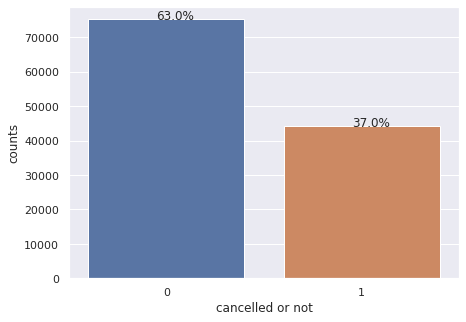

In [115]:
plt.figure(figsize=(7,5))
ax = sns.countplot(df10['is_canceled'])
plt.xlabel('cancelled or not')
plt.ylabel('counts')
without_hue(ax, df10['is_canceled'])

In [116]:
df10['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [117]:
# if a guest book a hotel, they have two options i.e resort or city hotel

## Cancellation rate for Resort Hotel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


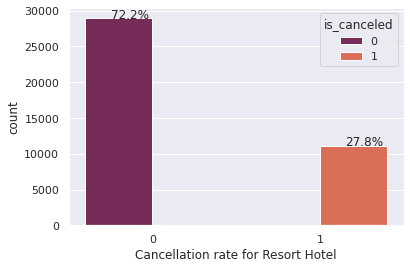

In [118]:
ax = sns.countplot(df10[df10['hotel'] == 'Resort Hotel']['is_canceled'],palette="rocket", hue = df10['is_canceled'])
plt.xlabel('Cancellation rate for Resort Hotel')
without_hue(ax, df10[df10['hotel'] == 'Resort Hotel']['is_canceled'])

In [119]:
## Cancellation rate for City Hotel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


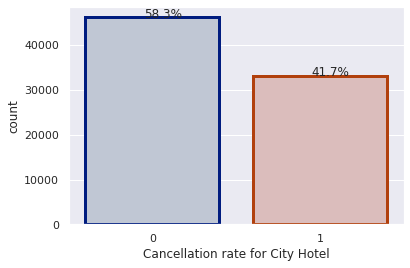

In [120]:
ax = sns.countplot(df10[df10['hotel'] == 'City Hotel']['is_canceled'],palette="vlag", edgecolor=sns.color_palette("dark", 3),linewidth=3)
plt.xlabel('Cancellation rate for City Hotel')
without_hue(ax, df10[df10['hotel'] == 'City Hotel']['is_canceled'])

In [121]:
#lets check, how many factors are responsible for cancellation (is_canceled)

# reserved and assigned impact

In [122]:
df11 = df10.copy()

In [123]:
df11['reserved_room_type'].value_counts()

A    85992
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [124]:
# so we have 10 types of rooms

In [125]:
df_assigned_other = df11[df11['reserved_room_type'] != df11['assigned_room_type']]

In [126]:
df_assigned_other['is_canceled'].value_counts()

0    14114
1      802
Name: is_canceled, dtype: int64

In [127]:
total = 14115+802
cancelled_after_different_room = 802

In [128]:
print('Percentage of people impact with different room assigned', cancelled_after_different_room/total*100 )

Percentage of people impact with different room assigned 5.3764161694710735


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


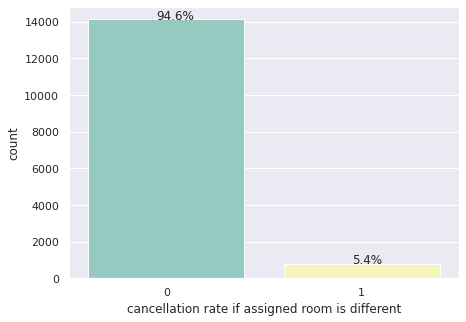

In [129]:
plt.figure(figsize=(7,5))
ax = sns.countplot(df_assigned_other['is_canceled'], palette="Set3")
plt.xlabel('cancellation rate if assigned room is different')
without_hue(ax, df_assigned_other['is_canceled'])

In [130]:
# so we can see, it does not impact cancellation if the hotel changes the room to different from what selected. 